In [9]:
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [10]:
(x_train,y_train),(x_test,y_test)=mnist.load_data(path='/Users/ccd/Desktop/Projects/005_Keras/mnist.npz')

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
?np_utils.to_categorical

In [13]:
from matplotlib import pyplot as plt

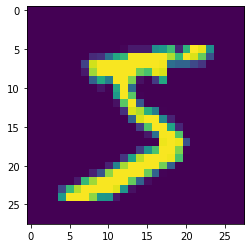

In [14]:
plt.imshow(x_train[0])

In [15]:
def generate_model():
    model=Sequential()
    
    #格式化input
    X_train = x_train.reshape(x_train.shape[0],784).astype('float32')
    X_test = x_test.reshape(x_test.shape[0],784).astype('float32')

    X_train= X_train/ 255
    X_test = X_test / 255

    # one hot encoding
    Y_train = np_utils.to_categorical(y_train)
    Y_test  = np_utils.to_categorical(y_test)

    num_classes= Y_test.shape[1]
    
    model.add(Dense(784,input_dim=784,kernel_initializer='normal',activation='relu'))
    model.add(Dense(10,kernel_initializer='normal',activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=200,verbose=2)
    
    return model

In [16]:
my_model= generate_model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2793 - accuracy: 0.9204 - val_loss: 0.1391 - val_accuracy: 0.9594
Epoch 2/10
 - 7s - loss: 0.1096 - accuracy: 0.9680 - val_loss: 0.0946 - val_accuracy: 0.9710
Epoch 3/10
 - 6s - loss: 0.0703 - accuracy: 0.9797 - val_loss: 0.0768 - val_accuracy: 0.9767
Epoch 4/10
 - 6s - loss: 0.0490 - accuracy: 0.9860 - val_loss: 0.0713 - val_accuracy: 0.9783
Epoch 5/10
 - 6s - loss: 0.0351 - accuracy: 0.9902 - val_loss: 0.0619 - val_accuracy: 0.9809
Epoch 6/10
 - 7s - loss: 0.0252 - accuracy: 0.9934 - val_loss: 0.0602 - val_accuracy: 0.9817
Epoch 7/10
 - 6s - loss: 0.0191 - accuracy: 0.9954 - val_loss: 0.0662 - val_accuracy: 0.9796
Epoch 8/10
 - 6s - loss: 0.0143 - accuracy: 0.9968 - val_loss: 0.0568 - val_accuracy: 0.9829
Epoch 9/10
 - 6s - loss: 0.0102 - accuracy: 0.9978 - val_loss: 0.0620 - val_accuracy: 0.9821
Epoch 10/10
 - 7s - loss: 0.0072 - accuracy: 0.9988 - val_loss: 0.0637 - val_accuracy: 0.9810


In [17]:
my_model.summary()

INFO (theano.gof.compilelock): Refreshing lock /Users/ccd/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.6.8-64/lock_dir/lock


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [18]:
X_train = x_train.reshape(x_train.shape[0],784).astype('float32')
X_test = x_test.reshape(x_test.shape[0],784).astype('float32')

X_train= X_train/ 255
X_test = X_test / 255

# one hot encoding
Y_train = np_utils.to_categorical(y_train)
Y_test  = np_utils.to_categorical(y_test)


In [19]:
scores=my_model.evaluate(X_test,Y_test,verbose=0)

In [20]:
scores

[0.06368658849864005, 0.9810000061988831]

In [21]:
print("Base Error: %.2f%%" %(100-scores[1]*100))

Base Error: 1.90%


#Predict

In [22]:
def predict():
    index= random.randint(0,X_test.shape[0])
    x=x_test[index]
    y=y_test[index]
    plt.imshow(x,cmap='gray_r')
    x.shape =  (1,784)
    predict = my_model.predict(x)
    predict = np.argmax(predict)
    print ("index is %s, original  is %s , predict is %s" %(index,y,predict))

In [23]:
#Predict case

index is 2607, original  is 7 , predict is 1


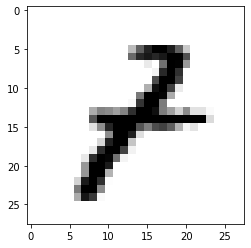

In [45]:
predict()